# Исследование объявлений о продаже квартир

**Цель**

Определеить факторы и параметры, влияющие на продажу квартир в Петербурге.

**На основе чего будет строиться анализ**

На основе архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (файл real_estate.csv).

**Что известно на данном этапе**

Ничего. Кроме того, что одна часть информации предоставлена пользователями,  другая - основана на картографических данных

**Что будем делать**
Поделим анализ на 5 этапов:

1) Общий обзор данных;


2) Их предобработка;


3) Расчеты;


4) Исследовательский анализ данных;


5) Сделаем общий вывод

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


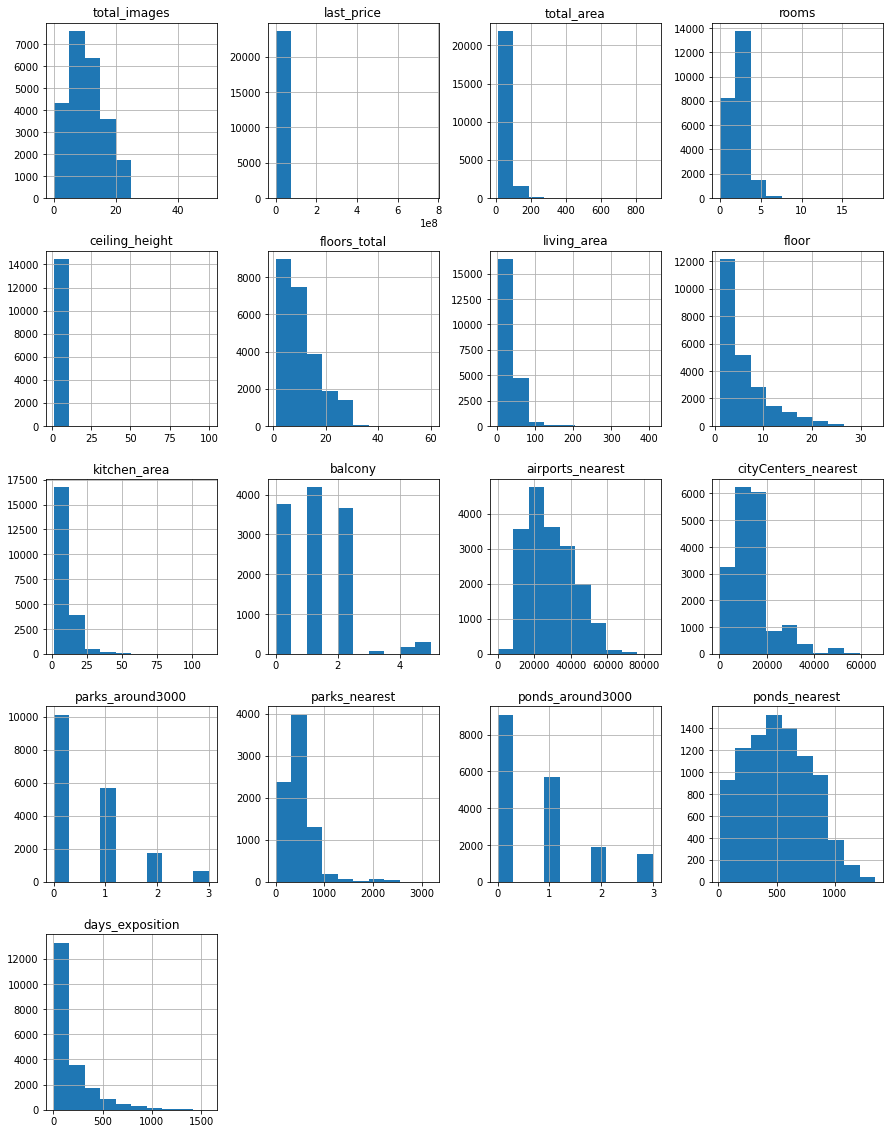

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(5))
display(df.info())
display(df.describe())
df.hist(figsize=(15, 20));
pd.set_option('display.max_columns', None)

Какие выводы можно сделать на основе этой информации:

1)Значения в столбцах различаются. Это говорит о том, что в файле есть пропуски



2)"Змеиный язык соблюден не везде

Сразу в глаза бросаются стаметровый потолок и квартира на 60 этажей этаже в Санкт-Петербурге. 

**Видно разброс в данных**

### Какие выводы можно сделать на первом этапе

На первый взгляд, данных много. Есть из чего выбрать. Но уже видны старнные объявления (например, стаметровый потолок). Проверим, есть ли еще какие-либо артефакты, на этапе предобработки данных


1)Значения в столбцах различаются. Это говорит о том, что в файле есть пропуски



2)"Змеиный язык соблюден не везде

### Предобработка данных

Для начала, приведем все названия в столбцах к единому "змеиному" стилю и проверим датасет на явные дубликаты

In [3]:
df.duplicated().sum() #проверяем датасет на явные дубликаты

0

Отлично, явных дубликатов нет. Можно идти дальше

In [4]:
#Для начала, приведем все названия в столбцах к единому "змеиному" стилю
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

total_images: 0.00%
last_price: 0.00%
total_area: 0.00%
first_day_exposition: 0.00%
rooms: 0.00%
ceiling_height: 38.80%
floors_total: 0.36%
living_area: 8.03%
floor: 0.00%
is_apartment: 88.29%
is_studio: 0.00%
is_open_plan: 0.00%
kitchen_area: 9.61%
balcony: 48.61%
locality_name: 0.21%
airports_nearest: 23.38%
city_centers_nearest: 23.29%
parks_around_3000: 23.28%
parks_nearest: 65.91%
ponds_around_3000: 23.28%
ponds_nearest: 61.56%
days_exposition: 13.42%


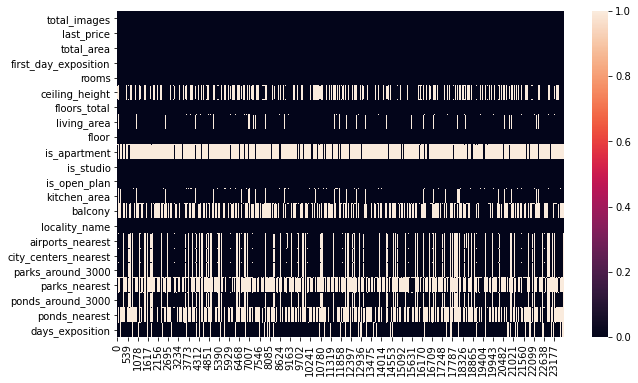

In [5]:
#глянем, где есть пропуски
#для наглядности, посмотрим на эту же информацию в процентном соотношении
#Для этого пройдемся по колонкам и получим кол-во пропусков(в каждом признаке за раз и поделим на общее кол-во в датасете)
for col in df.columns:
    print(f'{col}: {df[col].isna().sum() / df.shape[0] * 100:.2f}%')
    
#и в взглянем на диаграмму этих пропусков
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose());

Здесь мы видим, что признак is_apartment является самым большим с точки зрения пропусков. Можно предположить, что люди не указывали этот параметр т.к. их жилье не является апартаментами

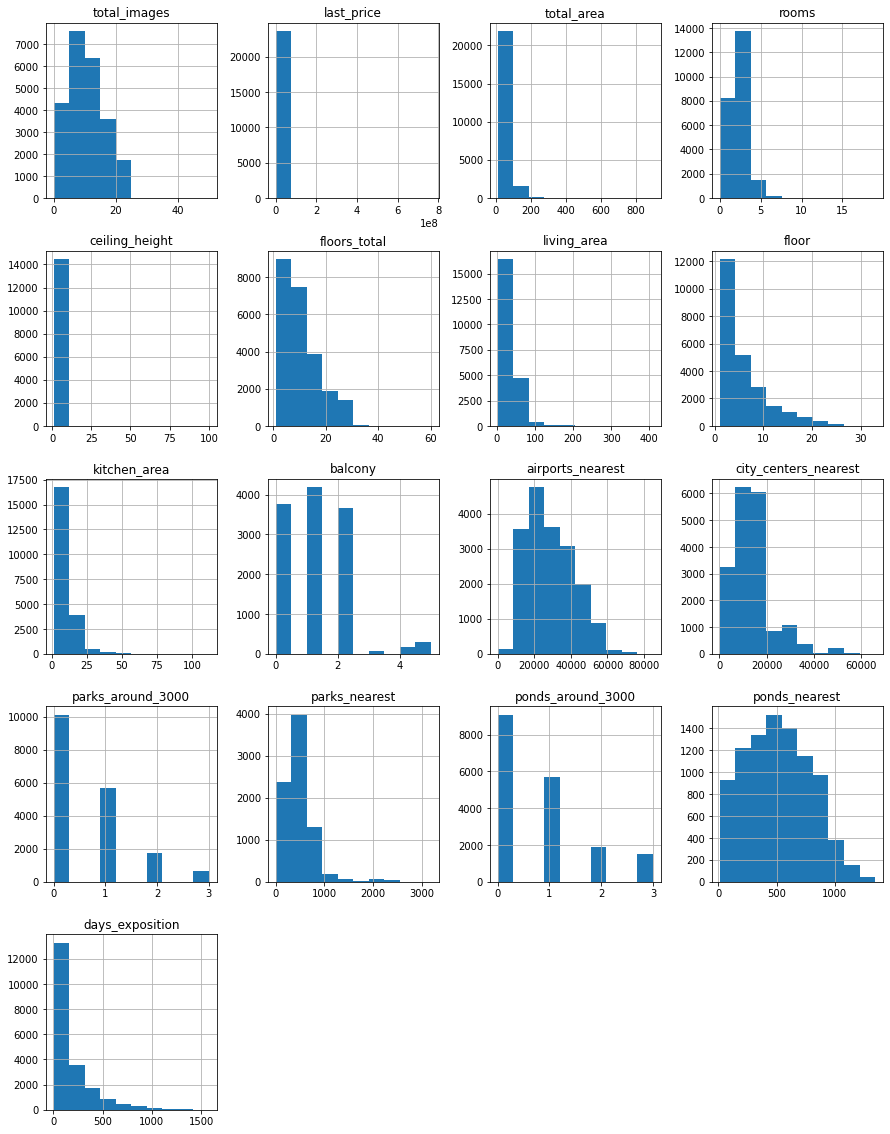

In [6]:
df.hist(figsize=(15, 20));

# Теперь заполним пропущенные значения там, где это возможно.

## is_apartment

Как и писал выше, самое большое кол-во пропусков находится в этом столбце(88.29%). Посмотрим на его распределение.

In [7]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)
# Видим, что значений False намного больше.
#Предположим, что пользователи не заполняли этот столбец, т.к. их жилье не является аппартаментами
#Заменим на False и проверим наличие пропусков
df['is_apartment'].isna().sum()

0

Отлично, пропуски заполнены. Можно идти дальше.

## balcony

Пропуски в этом столбце можно обработать несколькими способами:


* заполинть медианный значением или средним

* заполнить нулями, предположив, что этот параметр не заполняли по аналогии с аппартаментами

* не трогать пропуски вообще.


Вариант с нулями кажется самым логичным, т.к. мы не знаем наверняка, есть там балкон на самом деле или нет. Заполним нулями

In [9]:
df['balcony'] = df['balcony'].fillna(0).astype(int) 
#заполняем нулями и сразу меняем тип на целочисленный
df['balcony'].isna().sum()
#проверим наличие пропусков

0

## days_exposition

Предположим, что пустые значения в `days_exposition` соответсвуют не снятым объявлениям (из `first_day_exposition`). Тогда их распределение даты размещения будет смещено вправо (в сторону более свежей даты). Проверим гипотезу.

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition']) #сразу приведем столбец к типу даты и времени

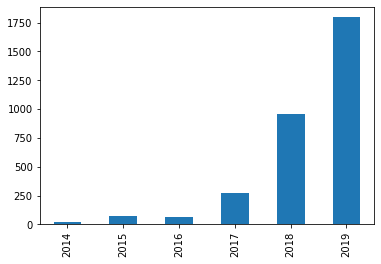

In [11]:
(
    df[df['days_exposition'].isna()]
    ['first_day_exposition']
    .dt.year
    .value_counts()
    .sort_index()
    .plot(kind='bar')
);

#визуализируем кол-во пропусков в столбце days_exposition

Здесь мы видим довольное большое значение пропусков в `days_exposition`. Это подтверждаем нашу гипотезу. Сравним с первым днем публикации объявления

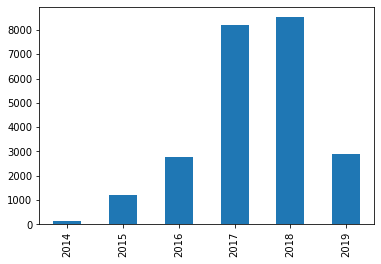

In [12]:
(
    df['first_day_exposition']
    .dt.year
    .value_counts()
    .sort_index()
    .plot(kind='bar')
);

Действительно, пустые значения в days_exposition соответсвуют более свежим объявлениям, что подтверждают гипотезу, что это неснятые с публикации объявления. Возможно, сервис только начал развиваться и к 2019 набрал обороты, резко сократив количество пропусков.


Для заполнения пропусков создадим переменную, которая отобразит, 
сколько дней было размещено объявление (от публикации до снятия или до последеней даты в датасете). Назовем ее `days_to_last_day`

In [13]:
days_to_last_day = (df['first_day_exposition'].max() - df['first_day_exposition']).dt.days
#здесь берем самую позднюю дату и разницу в днях

In [14]:
df['days_exposition'] = df['days_exposition'].fillna(days_to_last_day).astype(int)
#заполняем пропуски и переводим в целичесленный тип
df['days_exposition'].isna().sum()
#проверим кол-во пропусков в столбце

0

## locality_name

Здесь небольшое кол-во пропусков(0.21%). Их можно и удалить, но чтобы не терять данные оставим как есть. 

In [15]:
df['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
поселок Жилпосёлок                                             1
деревня Ялгино                                                 1
садоводческое некоммерческое товарищество Лесная Поляна        1
посёлок Коробицыно                                             1
садовое товарищество Новая Ропша                               1
Name: locality_name, Length: 364, dtype: int64

Самый большой город - Санкт-Петербург. Ожидаемо. Но не будем ничего здесь трогать, т.к в датасете присутствуют объявления и из Ленинградской области.

## ceiling_height

Попробуем его заполнить медианным значением, т.к. медиана более устойчива к выбросам. 

Но сначала взглянем на распределение, чтобы убедится, что медиана не сильно повлияет на столбец

Кол-во пропусков: 9195


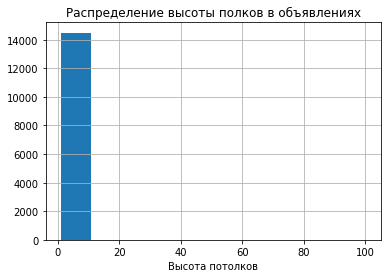

<Figure size 720x216 with 0 Axes>

In [16]:
print('Кол-во пропусков:', df['ceiling_height'].isna().sum())
df['ceiling_height'].hist(bins=10)
plt.title('Распределение высоты полков в объявлениях')
plt.xlabel('Высота потолков')
plt.figure(figsize=(10,3))
plt.show()

Кажется, не сильно повлияет. Заменим пропуски медианой и проверим, прошла ли замена корректно.

In [17]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

## floors_total

Здесь пропусков не такое большое кол-во (0.36%), их можно удалить. Данные не потеряют информативность.

In [18]:
df = df.dropna(subset=['floors_total'], axis=0) 
df = df.reset_index(drop=True)
df['floors_total'].isna().sum()

0

## living_area

Перед заменой проверим гипотезу: "чем больше площадь - больше цена". Для этого проверим корреляцию с ценой методом corr()

Возможно, данные можно восстановить из столбца с ценой

In [19]:
df['living_area'].corr(df['last_price'])

0.5663955721081748

Корреляция в 0.57 говорит о наличии связи, однако не слишком сильной. Заменим пропуски медианой и проверим результат

In [20]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())
df['living_area'].isna().sum()

0

## parks_around_3000, parks_around_3000

Предположим, что здесь ситуация аналогичная с балконами. Что данные поля не заполнили потому, что парков и прудов в радиусе 3 км нет. Заполним пропуски столбцов нулями

In [21]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype(int)  #переведем в целочисленный
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype(int)  #переведем в целочисленный

In [22]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(777).astype(int)
df['airports_nearest'] = df['airports_nearest'].fillna(777).astype(int)
#поставим "заглушки", чтобы была возможность перевести в целочисленный тип

**Вывод**

Мы выбрали столбцы, в которых возможно заполнить пропуски и заполнили их.

Как мы это делали:
* a) восстанавливали из других данных
* b) заменяли медианным значением
* c) удаляли

**В остальных столбцах оставим пропуски потому что:**

**a)**
их не представляется возможным восстановить из каких-либо других данных. 

**b)**
некоторые из столбцов являются картографическими

Также предполагаю, что причина пропусков может заключаться в том, что люди попросту могли не обладать той информацией, которое запрашивают в объявлении.

**В каких столбцах поменяли данные:**

* balcony: float -> int (после заполения пропусков нулями)
* is_apartment: float -> bool (после заполения пропусков False и исходя из документации)
* days_exposition: float -> int (после заполения пропусков целыми числами)
* first_day_exposition: object -> datetime64 (колонка имеет данные о дате размещения)
* parks_around_3000: float -> int (после заполения пропусков нулями)
* ponds_around_3000: float -> int (после заполения пропусков нулями)
* city_centers_nearest float -> int (после заполнения пропусков "заглушкой)
* airports_nearest float -> int (после заполнения пропусков "заглушкой)

# Теперь устраним неявные дубликаты в названиях населённых пунктов

Рассмотрим уникальные значения в столбце `locality_name`

In [23]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Напрашиваются **2 варианта** решения вопроса с дубликатами

**1)** Заменить во всех словах столбца буквы ё на е


**2)** Удалить типы муниципальных образований и оставить только названия населенных пунктов

Второй вариант кажется надежнее. Чтобы не путаться, оставим только названия НП., т.к. задача по геоаналитике у нас не стоит

In [24]:
extra_values_list = ['поселок', 'деревня', 'городской', 'коттеджный', 'посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской посёлок', 'городской поселок', 'село', 'садовое товарищество', 'садовое некоммерческое товарищество', 'коттеджный поселок', 'коттеджный посёлок', 'городского типа']
name = ''
for d in extra_values_list:
    df['locality_name'] = df['locality_name'].str.replace(d, name, regex=True).str.strip()

In [25]:
df['locality_name'].unique()  #Посмотрим, какие названия остались

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Так гораздо лучше

# Рассмотрим столбцы и устраним редкие и выбивающиеся значения

## total_images

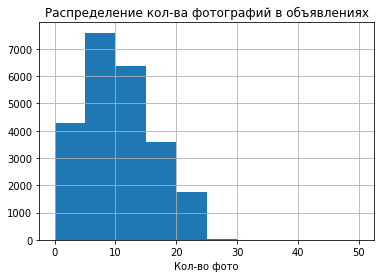

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23613.000000
mean         9.874518
std          5.681541
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

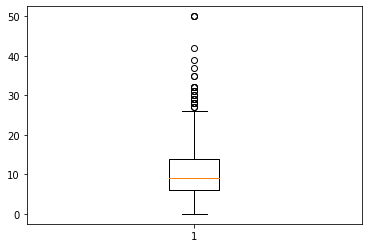

In [26]:
df['total_images'].hist(bins=10)
plt.title('Распределение кол-ва фотографий в объявлениях')
plt.xlabel('Кол-во фото')
plt.figure(figsize=(10,3))
plt.show()
plt.boxplot(x=df['total_images'])
print('Кол-во пропусков:', df['total_images'].isna().sum())
df['total_images'].describe()

Чаще всего размещают 5-10 фотографий. Но много без фотографий вообще. Посчитаем их количество

In [27]:
sum(df['total_images'] == 0)

1052

Их достаточно много. Но оставим как есть. 
Также по "ящику с усами" видим несколько значений от 35 фото и выше. Посчитаем их кол-во

In [28]:
sum(df['total_images'] > 35)

6

In [29]:
df[df['total_images'] > 35].sample(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
9747,50,11000000.0,87.0,2017-10-25,2,2.65,25.0,32.5,11,False,False,False,31.0,5,Санкт-Петербург,9586,11649,0,NaN,0,NaN,3
1054,39,1900000.0,63.0,2017-09-29,3,2.65,5.0,44.2,5,False,False,False,6.3,1,Лопухинка,777,777,0,NaN,0,NaN,106
21121,37,11500000.0,65.7,2018-02-01,2,2.65,25.0,23.0,10,False,False,False,21.0,2,Санкт-Петербург,10663,12738,0,NaN,0,NaN,64
15095,42,17998000.0,138.6,2017-09-27,4,2.65,18.0,93.1,17,False,False,False,16.0,2,Санкт-Петербург,34991,11920,0,NaN,0,NaN,172
17328,50,14500000.0,119.7,2017-12-02,4,4.00,4.0,87.5,3,False,False,False,13.5,0,Санкт-Петербург,24375,2410,1,551.0,2,617.0,106
12614,50,20500000.0,76.0,2017-12-10,3,2.65,20.0,47.0,16,False,False,False,29.0,0,Санкт-Петербург,50812,16141,0,NaN,0,NaN,5


Т.к. данные все-таки не полупустые, предлагаю эти объявления не удалять, а ограничить указанным интервалом.

И данные сохраним, и от анамалии избавимся

In [30]:
df['total_images'] = df['total_images'].clip(upper=20) 
#объявления с кол-вом фото больше 20 приравняются к 20

## last_price

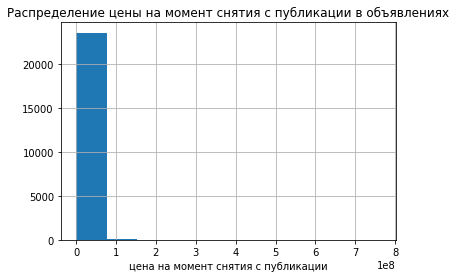

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

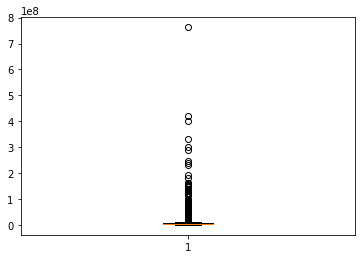

In [31]:
df['last_price'].hist(bins=10)
plt.title('Распределение цены на момент снятия с публикации в объявлениях')
plt.xlabel('цена на момент снятия с публикации')
plt.figure(figsize=(10,3))
plt.show()
plt.boxplot(x=df['last_price'])
print('Кол-во пропусков:', df['last_price'].isna().sum())
df['last_price'].describe().round(2)

Средний ценик - примерно 6,5 млн.руб., максимальная цена - 763 млн., минимальная - 12 тыс. рублей. 

Рассмотрим сначала максимальное значение.

In [32]:
df[df['last_price'] > 700000000] #посмотрим самую дорогую квартиру в датасете

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12917,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108,3956,1,530.0,3,756.0,33


In [33]:
df = df.loc[df['last_price'] < 700000000]
#сложно предположить, сколько может стоить квартира с 7 комнатами. 
#Но цена выглядит не очень адекватной. Удаляем.

Посмотрим, сколько квартир с аномально низкой ценой

In [34]:
#Теперь посмотрим квартиру за 12 тысяч
df[df['last_price'] < 50000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8765,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805.0,0,NaN,8


Также 1 запись. Не такая большая потеря для данных. Можно удалить. Также, можно предположить, что здесь ошиблись с нулями, равно как и в случае выше...
Но наверянка мы не знаем. Удалим

In [35]:
df = df[df['last_price'] > 50000]

## total_area

Кол-во пропусков: 0


count    23611.000000
mean        60.324232
std         35.580486
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

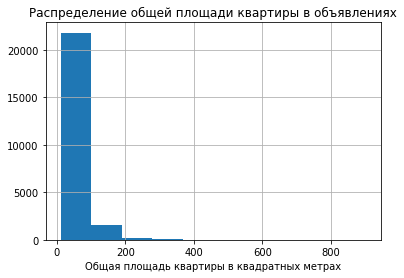

<Figure size 720x216 with 0 Axes>

In [36]:
df['total_area'].hist(bins=10)
plt.title('Распределение общей площади квартиры в объявлениях')
plt.xlabel('Общая площадь квартиры в квадратных метрах')
plt.figure(figsize=(10,3))
print('Кол-во пропусков:', df['total_area'].isna().sum())
df['total_area'].describe()

Здесь мы видим, что основая площадь квартир в объявлениях: до 100 квадратных метров. Но есть квартира в 900 квадратных метров. Посмотрим на нее

In [37]:
df[df['total_area'] > 700]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19465,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706,7877,0,NaN,2,318.0,106


In [38]:
df = df.loc[df['total_area'] < 800]

#Выглядит как выброс. Удаляем

Выбивающиеся значение было слишком большим и навело на мысль. 


Т.к. речь все-таки о жилплощади, проверим, нет ли в данных других неточностей.


Например:сложим площадь кухни с жилой и сравним с общей площадью квартиры. Для этого создадим переменную `anomaly` и сохраним в нее результат.

In [39]:
df['anomaly'] = df['kitchen_area'] + df['living_area']
df.query('anomaly > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
184,7,2600000.0,30.20,2018-02-14,1,2.65,9.0,26.10,5,False,False,False,6.20,0,Санкт-Петербург,13952,15031,0,NaN,1,824.0,12,32.30
542,9,4700000.0,23.80,2018-12-28,1,2.65,18.0,20.00,9,False,False,False,5.00,0,Санкт-Петербург,9731,11849,0,NaN,0,NaN,108,25.00
548,8,3100000.0,31.59,2018-03-08,1,2.70,19.0,30.55,2,False,False,False,9.28,2,Мурино,777,777,0,NaN,0,NaN,70,39.83
598,12,5600000.0,53.70,2017-04-18,2,2.50,12.0,48.30,5,False,False,False,7.00,2,Санкт-Петербург,50477,13252,2,220.0,1,1250.0,167,55.30
692,1,3364930.0,34.69,2014-11-27,1,2.64,25.0,23.43,25,False,False,False,23.43,2,Санкт-Петербург,43396,12153,0,NaN,0,NaN,574,46.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23118,13,4919880.0,67.92,2018-10-23,2,2.65,3.0,63.00,3,False,False,False,13.04,0,Всеволожск,777,777,0,NaN,0,NaN,60,76.04
23154,8,5790000.0,36.30,2019-01-25,1,2.55,11.0,30.00,6,False,False,False,8.20,1,Санкт-Петербург,31118,7257,1,241.0,1,230.0,98,38.20
23208,6,2980000.0,36.02,2018-07-26,1,2.65,27.0,30.00,27,False,False,False,9.26,1,Мурино,777,777,0,NaN,0,NaN,72,39.26
23242,12,4090000.0,30.80,2018-09-09,1,2.50,9.0,30.00,7,False,False,False,8.00,0,Санкт-Петербург,9921,11145,0,NaN,0,NaN,172,38.00


Ну и ну. 151 запись... Но, ничего не поделать. Записей слишком много, чтобы их удалять. К тому же, они все же частично заполнены.

Для из ряда вон выходящих аномалий у нас теперь есть столбец `anomaly`, на которых сможем ориентироваться


Будем иметь в виду подобные несостыковки в виду

## living_area

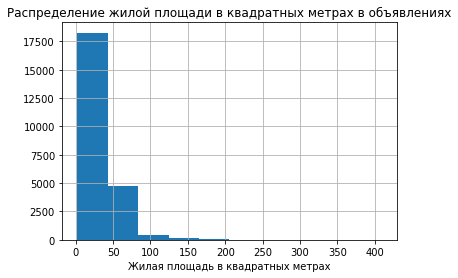

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23610.00
mean        34.08
std         20.99
min          2.00
25%         19.00
50%         30.00
75%         41.10
max        409.00
Name: living_area, dtype: float64

In [40]:
df['living_area'].hist(bins=10)
plt.title('Распределение жилой площади в квадратных метрах в объявлениях')
plt.xlabel('Жилая площадь в квадратных метрах')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['living_area'].isna().sum())
df['living_area'].describe().round(2)

Основное кол-во объявлений имеет жилую площадь до 40 квадратных метров.


Однако, есть квартира, где жилая площадь составляет 400 квадратов. Похоже на выброс Посмотрим на нее.

In [41]:
df[df['living_area'] > 400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
5339,20,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447,4666,1,767.0,0,NaN,14,509.0


Возможно, здесь случайно добавили лишний ноль, как и в площади кухни. Или объявление относится к сегменту элитного жилья. 

Но так или иначе, эта запись имеет сильно выбивающиеся значение. Лучше ее убрать

In [42]:
df = df.loc[df['living_area'] < 400] #удаляем

Теперь взглянем на записи с очень маленьким значением жилой площади

In [43]:
df[df['living_area'] < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
3232,7,4440000.0,41.0,2017-07-02,1,2.65,17.0,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272,13073,0,NaN,0,NaN,216,14.0
13859,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453,6521,0,NaN,1,1012.0,91,11.0
21677,0,2330000.0,23.0,2018-01-01,0,2.65,24.0,2.0,22,False,True,False,NaN,0,Мурино,777,777,0,NaN,0,NaN,66,NaN
23490,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255,5975,1,630.0,3,100.0,280,19.0


Одна, двух и трехкомнатные квартиры с жилой площадью 3 и 2 квадратных метра выглядит странно. Удаляем

In [44]:
df = df.loc[df['living_area'] > 5]

## kitchen_area

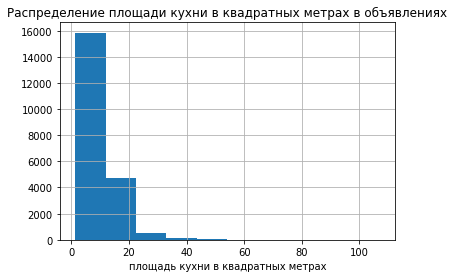

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 2228


count    21376.00
mean        10.55
std          5.83
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        107.00
Name: kitchen_area, dtype: float64

In [45]:
df['kitchen_area'].hist(bins=10)
plt.title('Распределение площади кухни в квадратных метрах в объявлениях')
plt.xlabel('площадь кухни в квадратных метрах')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['kitchen_area'].isna().sum())
df['kitchen_area'].describe().round(2)

Здесь мы видим, что в основной части объявлений, обозначены кухни до 10 метров.


Согласно закону, площадь кухни  должна быть не менее 8 м (исключение: допускается не менее 5 метров в однушках). Проверим.

In [46]:
df[df['kitchen_area'] > 100] #сначала посмотрим квартиры с большой площадью кухни

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
2482,9,12500000.0,255.0,2017-04-21,3,2.65,2.0,153.9,2,False,False,False,100.7,0,Санкт-Петербург,29544,6916,0,NaN,3,198.0,102,254.6
20139,2,85000000.0,249.7,2018-02-01,3,2.65,10.0,72.0,9,False,False,False,107.0,4,Санкт-Петербург,31532,4624,1,2218.0,2,99.0,26,179.0


Трехкомнатные квартиры с площадью в 250 квадратных метров: типичные представители элитного рынка недвижимости.

In [47]:
df[df['kitchen_area'] < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
76,12,2800000.0,55.1,2016-05-14,3,2.60,5.0,38.4,1,False,False,False,4.9,0,Кировск,777,777,0,NaN,0,NaN,606,43.3
296,9,2650000.0,42.8,2017-04-25,2,2.65,5.0,30.0,3,False,False,False,4.5,0,Гатчина,777,777,0,NaN,0,NaN,49,34.5
420,8,1700000.0,55.2,2018-03-24,3,2.50,5.0,38.5,5,False,False,False,4.5,0,Кириши,777,777,0,NaN,0,NaN,405,43.0
902,15,2600000.0,27.0,2017-07-10,1,2.75,23.0,18.0,18,False,False,False,2.0,0,Санкт-Петербург,22131,17459,0,NaN,1,411.0,10,20.0
1323,6,2650000.0,46.2,2016-12-01,2,2.50,5.0,29.2,5,False,False,False,4.9,0,Гатчина,777,777,0,NaN,0,NaN,704,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22755,14,3350000.0,27.0,2018-11-03,1,2.70,16.0,30.0,6,False,False,False,4.0,2,Санкт-Петербург,41935,9551,0,NaN,0,NaN,35,34.0
22765,6,2380000.0,25.0,2016-03-22,1,2.65,25.0,19.0,15,False,False,False,4.0,1,Шушары,13461,19247,0,NaN,1,351.0,140,23.0
23026,1,2900000.0,34.0,2018-02-01,2,2.90,2.0,20.0,1,False,False,False,4.0,0,Стрельна,27006,23832,0,NaN,2,872.0,196,24.0
23414,7,1600000.0,54.0,2016-12-26,2,2.30,1.0,33.0,1,False,False,False,3.5,0,Высоцк,777,777,0,NaN,0,NaN,281,36.5


Достаточно много записей. К сожалению, очистить от них датасет, не исказив данные, не получится. Перепланироваки квартир никто не отменял...

Придется оставить как есть

## first_day_exposition

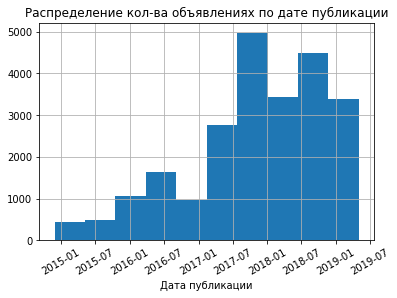

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


In [48]:
df['first_day_exposition'].hist(bins=10)
plt.title('Распределение кол-ва объявлениях по дате публикации')
plt.xlabel('Дата публикации')
plt.xticks(rotation=30)
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['first_day_exposition'].isna().sum())

Таблица содержит данные с 2014 по начало мая 2019 годов. Заметен резкий рост продаж с 2017 года. Аномалиями не пахнет

## days_exposition

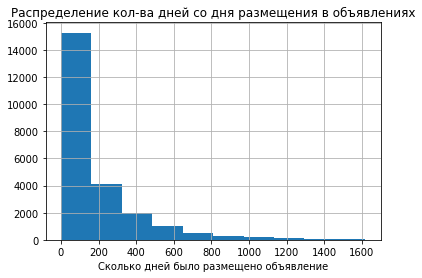

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23604.00
mean       185.91
std        233.45
min          0.00
25%         43.00
50%         94.00
75%        237.00
max       1618.00
Name: days_exposition, dtype: float64

In [49]:
df['days_exposition'].hist(bins=10)
plt.title('Распределение кол-ва дней со дня размещения в объявлениях')
plt.xlabel('Сколько дней было размещено объявление')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['days_exposition'].isna().sum())
df['days_exposition'].describe().round(2)

Видно как свежие объявления, так и очень старые. Причем аш больше тысячи  Посмотрим, что с ними не так

In [50]:
df[df['days_exposition'] > 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
109,2,7497600.0,62.5,2015-12-08,2,2.65,5.0,35.5,5,False,False,False,9.5,0,Пушкин,14517,26670,1,517.0,0,NaN,1048,45.0
258,8,17250000.0,102.4,2014-12-09,3,2.65,8.0,53.2,3,False,False,False,19.3,1,Санкт-Петербург,39393,11096,1,537.0,0,NaN,1606,72.5
351,4,5990000.0,43.5,2015-05-08,1,3.00,5.0,25.0,4,False,False,False,9.4,0,Санкт-Петербург,10527,10278,1,93.0,0,NaN,1292,34.4
379,11,2600000.0,86.3,2016-05-24,4,3.00,3.0,63.0,3,False,False,False,7.3,1,Волхов,777,777,0,NaN,0,NaN,1074,70.3
396,7,12789000.0,79.3,2014-12-09,2,3.00,8.0,43.1,5,False,False,False,17.6,0,Санкт-Петербург,39393,11096,1,537.0,0,NaN,1345,60.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23305,6,2850000.0,40.0,2015-01-26,1,2.60,10.0,19.0,8,False,False,False,9.0,2,Бугры,777,777,0,NaN,0,NaN,1012,28.0
23321,10,3600000.0,31.0,2016-05-29,1,2.50,5.0,17.0,5,False,False,False,7.0,1,Санкт-Петербург,42636,15140,1,648.0,0,NaN,1069,24.0
23342,17,8778000.0,47.5,2014-12-29,1,3.00,7.0,30.0,4,False,False,False,11.7,2,Санкт-Петербург,39412,10186,1,1424.0,3,204.0,1360,41.7
23451,10,9400000.0,65.6,2015-03-11,1,2.65,8.0,24.7,1,False,False,False,15.0,0,Санкт-Петербург,39384,11087,1,471.0,0,NaN,1514,39.7


Судя по параметрам, эти квартиры не представляют собой элитный сигмент.
Параметры довольно средние.
Вижу несколько вариантов, почему объявление так долго висит:

**a)** Неоправдано высокая цена или объявление само по себе сомнительное


**б)** Статус продажи мог быть не обновален самим продавцом(квартира может быть давно продана, а объявление висит)


**с)** Как правило, сервисы изначально выкладывают свежие объявления. Если квартира давно висит, многие пользователи могут просто до нее не дойти в поиске.

Как бы там ни было, это большой пласт для анализа. Оставим, как есть

## rooms

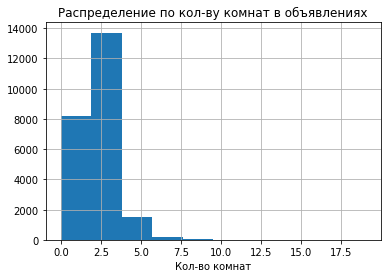

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23604.00
mean         2.07
std          1.07
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

In [51]:
df['rooms'].hist(bins=10)
plt.title('Распределение по кол-ву комнат в объявлениях')
plt.xlabel('Кол-во комнат')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['rooms'].isna().sum())
df['rooms'].describe().round(2)

Основная часть объявлений: одна, двух и трехкомнатные квартиры. 

Но есть и квартиры с большим кол-вом комнат. 
Ящик с усами подсказывает, что начать обзор стоит с 6-7 комнат. Именно оттуда начинаются выбросы

In [52]:
df[df['rooms'] > 7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
645,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606,3148,0,NaN,0,NaN,306,152.1
809,7,16500000.0,229.0,2016-02-25,8,2.65,6.0,160.0,5,False,False,False,25.0,0,Санкт-Петербург,23968,4536,1,243.0,0,NaN,806,185.0
862,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076,7950,0,NaN,2,435.0,418,238.6
4135,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726,12169,1,191.0,1,531.0,477,164.7
4421,13,22190000.0,191.2,2017-12-05,8,2.90,6.0,115.8,1,False,False,False,5.0,0,Санкт-Петербург,21589,1152,1,587.0,2,155.0,115,120.8
7831,11,150000000.0,230.0,2017-10-25,8,2.65,8.0,220.0,8,False,False,False,NaN,0,Санкт-Петербург,25525,5845,2,116.0,0,NaN,135,NaN
8730,5,16100000.0,150.0,2018-07-10,8,2.92,5.0,107.0,1,False,False,False,7.2,0,Санкт-Петербург,26080,4782,2,473.0,0,NaN,297,114.2
8794,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.1,1,False,False,False,41.0,0,Санкт-Петербург,17720,16722,3,471.0,2,440.0,471,201.1
8832,12,17000000.0,235.0,2018-07-14,9,3.00,6.0,30.0,3,False,False,False,NaN,0,Санкт-Петербург,24466,5034,1,346.0,0,NaN,90,NaN
9519,10,23500000.0,313.0,2017-02-13,9,3.20,6.0,179.2,5,False,False,False,13.2,0,Санкт-Петербург,38435,10138,1,146.0,0,NaN,809,192.4


6 - 14 комнат еще возможно себе представить. 

Возможно, для очень многодетных семей (от 10 детей +) такое решение не кажется фантастическим. 


Люди делают перепланировку, объединяют 3-4 квартиры и получаются такие параметры. Но никак не 19..

Удалим из датасета квартиры больше 14 комнат

In [53]:
df = df.loc[df['rooms'] < 14]

## ceiling_height

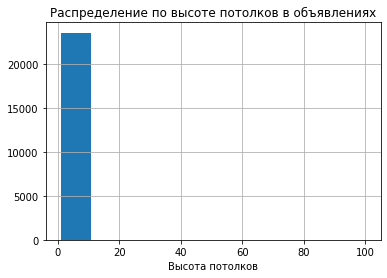

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23600.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

In [54]:
df['ceiling_height'].hist(bins=10)
plt.title('Распределение по высоте потолков в объявлениях')
plt.xlabel('Высота потолков')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['ceiling_height'].isna().sum())
df['ceiling_height'].describe().round(2)

Оптимальной нормой высоты потолка в России считается 2,4 метра. 

В новостройках это значение находится в пределах 2,5-2,7 метра. 

Для элитного жилья показатель может превышать 3 метра.


Исходя из этих цифр и учитывая, что в объявлениях наверняка есть объявления

квартир класса люкс (потолки могут быть в разы выше, чем у стандартных 

квартир), установим порог высоты потолков в 10 метров. Посмотрим, сколько их.

In [55]:
df[df['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
353,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2,Гатчина,777,777,0,NaN,0,NaN,259,NaN
3138,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,0,Волхов,777,777,0,NaN,0,NaN,172,61.0
4628,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016,13256,1,658.0,1,331.0,181,37.0
4860,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,False,True,NaN,2,Мурино,777,777,0,NaN,0,NaN,28,NaN
5059,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686,8389,3,397.0,1,578.0,7,25.0
5227,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,False,False,9.0,2,Мины,777,777,0,NaN,0,NaN,540,39.0
5650,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28981,10912,1,305.0,0,NaN,267,28.3
5787,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732,20444,0,NaN,3,80.0,38,53.0
6223,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,False,False,5.7,0,Кронштадт,68923,50649,1,417.0,2,73.0,39,37.0
9349,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11647,13581,0,NaN,0,NaN,768,35.2


Выглядит странно. Средняя высота девятиэтажного дома - около 30 метров. 


Здесь что-то не так. Высоковато даже для элитной квартиры.


Воспользуемся подсказкой Яндекс Практикума и предположим, что запятая у аномально больших значений все же смещена. 


Попробуем это исправить и:

1)Возмьмем значения которые больше или равны 24 и меньше или равны 32 и поделим их на 10  

2)Посмотрим на значения больше 10 еще раз

In [56]:
df.loc[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 32),'ceiling_height'] = df['ceiling_height']/10
# "ставим запятую" у высоких потолков
df[df['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
14999,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814,13610,0,NaN,0,NaN,315,41.5
17428,15,6700000.0,92.9,2019-02-19,3,20.0,17.0,53.2,14,False,False,False,12.0,5,Санкт-Петербург,16295,15092,1,967.0,0,NaN,73,65.2
20430,12,5950000.0,60.0,2018-02-19,2,22.6,14.0,35.0,11,False,False,False,13.0,1,Санкт-Петербург,27028,12570,0,NaN,0,NaN,40,48.0
22228,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,False,False,NaN,0,Санкт-Петербург,36353,11936,2,440.0,2,450.0,136,NaN
22785,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223.0,3,30.0,19,25.0


Другое дело! 4 записи можно и удалить

In [57]:
df = df.loc[df['ceiling_height'] < 10]

## floors_total

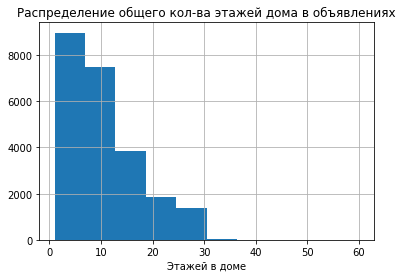

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23595.000000
mean        10.672219
std          6.595960
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [58]:
df['floors_total'].hist(bins=10)
plt.title('Распределение общего кол-ва этажей дома в объявлениях')
plt.xlabel('Этажей в доме')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['floors_total'].isna().sum())
df['floors_total'].describe()

Видим что есть здание в 60 этажей. Гугл выдает в топе самых высокий зданий Питера:


Лахта-центр (88 этажей), Лидер Тауэр(42 этажа), ЖК «Князь Александр Невский»(37 этажей).


Выходит, максимум в Петербурге для жилых комплексов - 37 этажей.


Следовательно, большего кол-ва этажей быть не может. Значит, значение больше 37 можно считать аномалией и удалить

In [59]:
df[df['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
2247,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763,49488,2,342.0,3,614.0,166,34.8
16664,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728,12978,1,793.0,0,NaN,45,24.5


In [60]:
df = df.loc[df['floors_total'] < 37] #удаляем
df['floors_total'] = df['floors_total'].astype(int) #переведем в целочисленный формат

## floor

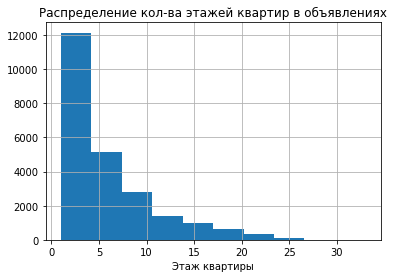

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23592.000000
mean         5.873686
std          4.869052
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [61]:
df['floor'].hist(bins=10)
plt.title('Распределение кол-ва этажей квартир в объявлениях')
plt.xlabel('Этаж квартиры')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['floor'].isna().sum())
df['floor'].describe()

Квартиры с аномально высокими этажами мы удалили выше. 


Здесь можно проверить только то, чтобы кол-во этажей в таблице не было быльше общего распределения этажей

In [62]:
df[df['floor'] > df['floors_total']]['floor'].count()

0

Хорошо. Идем дальше.

## balcony

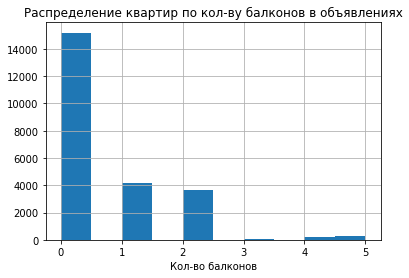

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23592.000000
mean         0.592786
std          0.959634
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [63]:
df['balcony'].hist(bins=10)
plt.title('Распределение квартир по кол-ву балконов в объявлениях')
plt.xlabel('Кол-во балконов')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['balcony'].isna().sum())
df['balcony'].describe()

Квартира с 5 балконами сразу привлекает внимание. Посмотрим на квартиры с 4 и 5 балконами и соотнесем с кол-вом комнат. При наличие большого кол-ва комнат, такое вполне возможно.

In [64]:
df.groupby(by='balcony')['rooms'].median() #смотрим соотношение балконов и комнат

balcony
0    2
1    2
2    2
3    3
4    3
5    3
Name: rooms, dtype: int64

5 балконов для трехкомнатной квартиры или 4 для двухкомнатной - большое кол-во. Приравняем выдающие значения к 3 балконам, чтобы не удалять записи. А то такими темпами и данных может не остаться.

In [65]:
df['balcony'] = df['balcony'].clip(upper=3)

## airports_nearest

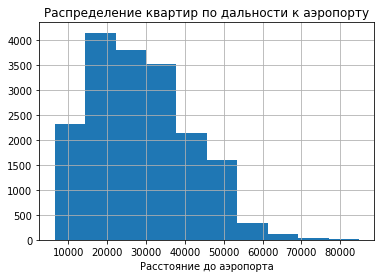

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23592.00
mean     22221.53
std      16214.28
min          0.00
25%      10143.00
50%      21855.00
75%      34298.00
max      84869.00
Name: airports_nearest, dtype: float64

In [66]:
df.query('airports_nearest > 777')['airports_nearest'].hist(bins=10) #отсеиваем заглушку
plt.title('Распределение квартир по дальности к аэропорту')
plt.xlabel('Расстояние до аэропорта')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['airports_nearest'].isna().sum())
df['airports_nearest'].describe().round(2)

Здесь мы наблюдаем удивительную вещь: квартира располагается прямо в аэропорту

Сразу ее уберем

In [67]:
df.query('airports_nearest < 1') #находим квартиру в аэропорту

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,anomaly
21007,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0,22801,0,NaN,0,NaN,60,25.8


In [68]:
df.drop(index=df.query('airports_nearest < 1').index,inplace=True) #удаляем

## city_centers_nearest

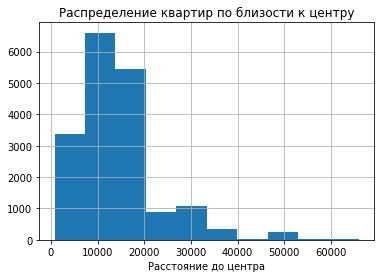

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23591.000000
mean     11056.703531
std       9436.057027
min        181.000000
25%       2182.000000
50%      11242.000000
75%      15242.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [69]:
df.query('city_centers_nearest > 777')['city_centers_nearest'].hist(bins=10) #отсеиваем заглушку
plt.title('Распределение квартир по близости к центру')
plt.xlabel('Расстояние до центра')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['city_centers_nearest'].isna().sum())
df['city_centers_nearest'].describe()

Видим, что в центре Питера продается много квартир. 

Это хорошо.
​


Кого-то ожидает прекрасный вид из окна. 
​
​
Оставим все как есть, включая пропуски, т.к. данные являются картографическими.

## parks_around_3000

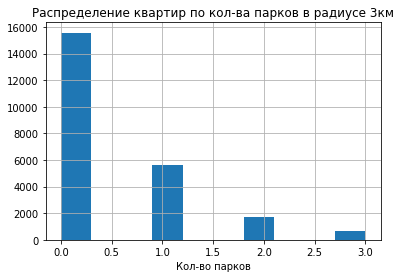

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23591.00
mean         0.47
std          0.75
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: float64

In [70]:
df['parks_around_3000'].hist(bins=10)
plt.title('Распределение квартир по кол-ва парков в радиусе 3км')
plt.xlabel('Кол-во парков')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['parks_around_3000'].isna().sum())
df['parks_around_3000'].describe().round(2)

Преимущественно, парков в ближайших 3 км у этих квартир нет. 


Аномалий не наблюдается. Можно идти дальше

## ponds_around_3000

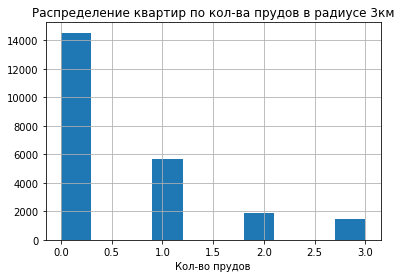

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 0


count    23591.000000
mean         0.589886
std          0.883823
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

In [71]:
df['ponds_around_3000'].hist(bins=10)
plt.title('Распределение квартир по кол-ва прудов в радиусе 3км')
plt.xlabel('Кол-во прудов')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['ponds_around_3000'].isna().sum())
df['ponds_around_3000'].describe()

Аналогичная ситуация и с прудами

## parks_nearest

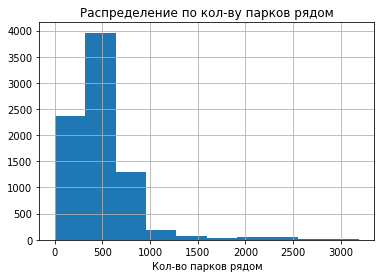

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 15558


count    8033.000000
mean      490.367609
std       341.457960
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [72]:
df['parks_nearest'].hist(bins=10)
plt.title('Распределение по кол-ву парков рядом')
plt.xlabel('Кол-во парков рядом')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['parks_nearest'].isna().sum())
df['parks_nearest'].describe()

Самое логичное, что можно здесь сравнить - расстояние до парка в радиусе 3км с 


расстоянием до ближайшего парка. Нет ли разницы в значения

In [73]:
df.query('parks_around_3000 > parks_nearest and parks_around_3000 !=0')['parks_around_3000'].count()

0

Отлично. Можно идти дальше

## ponds_nearest

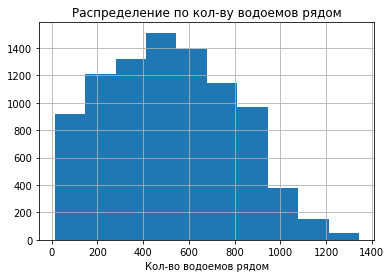

<Figure size 720x216 with 0 Axes>

Кол-во пропусков: 14542


count    9049.000000
mean      518.331639
std       277.843952
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [74]:
df['ponds_nearest'].hist(bins=10)
plt.title('Распределение по кол-ву водоемов рядом')
plt.xlabel('Кол-во водоемов рядом')
plt.figure(figsize=(10,3))
plt.show()
print('Кол-во пропусков:', df['ponds_nearest'].isna().sum())
df['ponds_nearest'].describe()

Аналогичную проверку провернем с водоемами

In [75]:
df.query('ponds_around_3000 > ponds_nearest and ponds_around_3000 !=0')['ponds_around_3000'].count()

0

**Вывод**


После предобработки данных, мы понимаем, что датафрейм содержит информацию о продаже недвижимости в Санкт-Петербурге и Ленинградской области за период 2014-2019 год

Что было сделано за эти несколько шагов:

1)убрали анамалии в данных


2)заполнили пропуски в даннах, насколько это возможно


3)преобразовали типы данных в столбцах 

In [76]:
old_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#сохраним данные до удаления в отдельной переменной
deleted_elements = df.shape[0]/ old_df.shape[0]
#соотносим датасет с обработкой с датасетом без обработки данных
deleted_elements

0.9954428456896915

Таким образом, мы видим, удаленные данные в датасете составляют 0.4 %

## Посчитаем и добавим в таблицу новые столбцы

### Цена одного квадратного метра

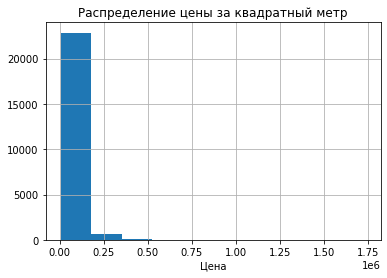

<Figure size 720x216 with 0 Axes>

In [77]:
df['price_sq_meter'] = df['last_price'] / df['total_area']
df['price_sq_meter'].hist(bins=10)
plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена')
plt.figure(figsize=(10,3))
plt.show()

### День недели публикации объявления

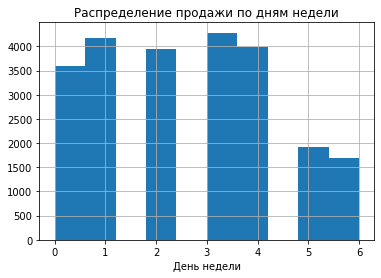

<Figure size 720x216 with 0 Axes>

In [78]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday'].hist(bins=10)
plt.title('Распределение продажи по дням недели')
plt.xlabel('День недели')
plt.figure(figsize=(10,3))
plt.show()

### Месяц публикации объявления

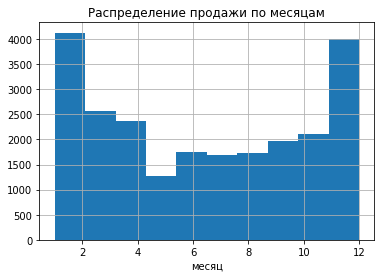

<Figure size 720x216 with 0 Axes>

In [79]:
df['month'] = df['first_day_exposition'].dt.month
df['month'].hist(bins=10)
plt.title('Распределение продажи по месяцам')
plt.xlabel('месяц')
plt.figure(figsize=(10,3))
plt.show()

### год публикации объявления

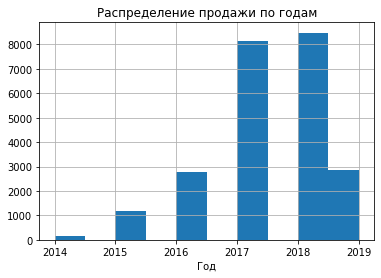

<Figure size 720x216 with 0 Axes>

In [80]:
df['year'] = df['first_day_exposition'].dt.year
df['year'].hist(bins=10)
plt.title('Распределение продажи по годам')
plt.xlabel('Год')
plt.figure(figsize=(10,3))
plt.show()

### Тип этажа квартиры

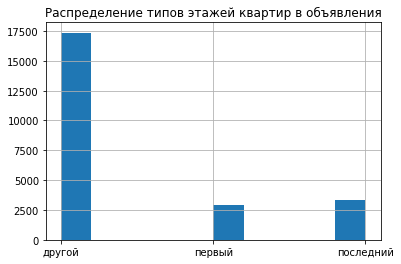

<Figure size 720x216 with 0 Axes>

In [81]:
df['floor_type'] = 'другой'
df['floor_type'] = (
    df['floor_type']
    .where(~(df['floors_total'] == df['floor']), 'последний')
    .where(~(df['floor'] == 1), 'первый')
)
df['floor_type'].hist(bins=10)
plt.title('Распределение типов этажей квартир в объявления')
plt.xlabel('')
plt.figure(figsize=(10,3))
plt.show()

### Расстояние до центра города в километрах

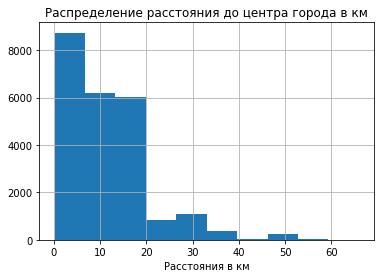

<Figure size 720x216 with 0 Axes>

In [82]:
df['city_centers_nearest'] = df['city_centers_nearest'].round(1)
#Округляю результат до целых значений в колонке с расстоянием до центра
df['city_centers_nearest_sq'] = (df['city_centers_nearest'] / 1000)
df['city_centers_nearest_sq'].hist(bins=10)
plt.title('Распределение расстояния до центра города в км')
plt.xlabel('Расстояния в км')
plt.figure(figsize=(10,3))
plt.show()

## Анализ времени продажи жилья

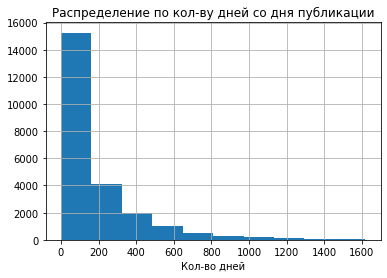

<Figure size 720x216 with 0 Axes>

count    23591.000000
mean       185.886228
std        233.372523
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [83]:
df['days_exposition'].hist(bins=10)
plt.title('Распределение по кол-ву дней со дня публикации')
plt.xlabel('Кол-во дней')
plt.figure(figsize=(10,3))
plt.show()
df['days_exposition'].describe()

**Посчитаем медиану от кол-ва дней по годам**

In [84]:
df['days_exposition'].median() #считаем медиану

94.0

In [85]:
df['days_exposition'].mean() #считаем среднее

185.8862277987368

Попробуем сделать сводную, для наглядности

In [86]:
median_days = df.pivot_table(index='year', values='days_exposition', aggfunc='median').reset_index().round(2)

median_days  #считаем медиану

,year,days_exposition
0,2014,946.0
1,2015,599.5
2,2016,248.0
3,2017,110.0
4,2018,78.0
5,2019,30.0


In [87]:
mean_days = df.pivot_table(index='year', values='days_exposition', aggfunc='mean').reset_index().round(2)
mean_days   #считаем среднее

,year,days_exposition
0,2014,1002.36
1,2015,692.16
2,2016,339.33
3,2017,174.52
4,2018,113.35
5,2019,37.34


**Вывод**

Тенденция к сокращению сроков продажи у всех примерно одинаковая. У свежих объявлений шансов к быстрой продаже заметно больше.

Самые долгие объявления висят с 2014 года

При этом, видно, что в 2019 году, есть высокий шанс продажи квартиры за месяц.

Также по цифрам, можно предположить, что **те цифры, что идут до медианы**, можно назвать **быстрыми продажами**


А те, что **больше среднего - долгими**

# Рассмотрим факторы, влияющие на полную стоимость квартиры

**Цена - Общая площадь**

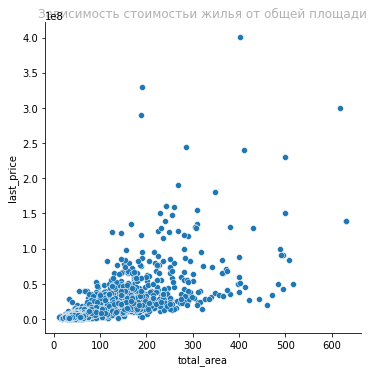

In [88]:
sns.relplot(x='total_area', y='last_price',data=df)
plt.title('Зависимость стоимостьи жилья от общей площади', fontsize= 12, alpha=0.3)
plt.show()

In [89]:
df['last_price'].corr(df['total_area']) #посчитаем корреляцию

0.6958726066960335

Здесь мы наблюдаем положительную корреляцию между ценой жилья и общей площадью

**Цена - Жилая площадь**

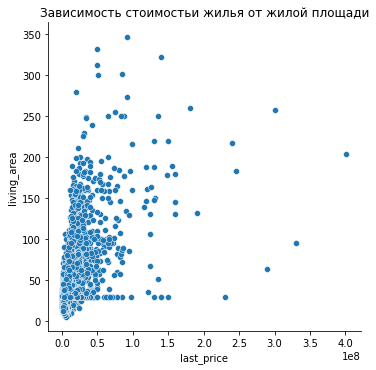

In [90]:
sns.relplot(x='last_price', y='living_area',data=df)
plt.title('Зависимость стоимостьи жилья от жилой площади', fontsize= 12)
plt.show()

In [91]:
df['last_price'].corr(df['living_area']) #считаем корреляцию

0.5684269061720776

Аналогично. Корреляция также прослеживается, хоть и не такая сильная

**Цена - Площадь кухни**

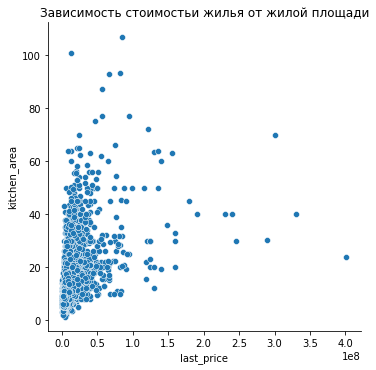

In [92]:
sns.relplot(x='last_price', y='kitchen_area',data=df)
plt.title('Зависимость стоимостьи жилья от жилой площади', fontsize= 12)
plt.show()

In [93]:
df['last_price'].corr(df['kitchen_area']) #считаем корреляцию

0.5104839963117538

Площадь кухни меньше всего влияет на итоговую цену квартиры

## Зависимость стоимостьи жилья от времени размещения объявления

**Цена - день размещения**

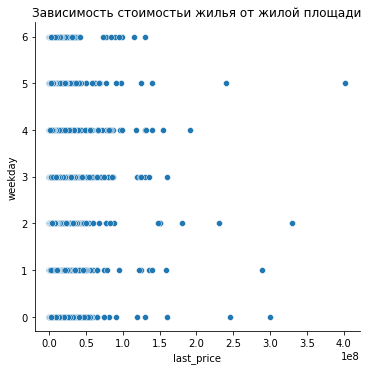

,weekday,last_price
0,0,4650000.0
1,1,4714595.0
2,2,4700000.0
3,3,4650000.0
4,4,4575000.0
5,5,4550000.0
6,6,4540000.0


In [94]:
sns.relplot(x='last_price', y='weekday',data=df)
plt.title('Зависимость стоимостьи жилья от жилой площади', fontsize= 12)
plt.show()
df.pivot_table(index='weekday',values='last_price',  aggfunc='median').reset_index()

Объявления размещенные в будни, в среднем, дороже чем те, что размещены в выходные.

**Предположение:**

Т.к. продавцы могут отслеживать активность пользователей, по отношению к своему объявлению, возможно, в их понимании, трафик посещения сайта по поиску жилья в будни выше, чем в выходные. 

Соответственно, шанс продать квартиру, по более высокой цене именно в будни выше. А по мере того, как долго висит объявление, можно постепенно снижать цену.

**Цена - месяц размещения**

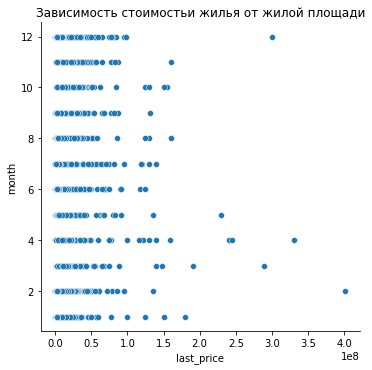

,month,last_price
0,1,4600000.0
1,2,4650000.0
2,3,4650000.0
3,4,4800000.0
4,5,4500000.0
5,6,4400000.0
6,7,4650000.0
7,8,4570000.0
8,9,4700000.0
9,10,4572500.0


In [95]:
sns.relplot(x='last_price', y='month',data=df)
plt.title('Зависимость стоимостьи жилья от жилой площади', fontsize= 12)
plt.show()
df.pivot_table(index='month',values='last_price',  aggfunc='median').reset_index()

Здесь мы наблюдаем подъем цены в апреле, далее - волнообразные подъемы и спуски вплодь до декабря. 


Предположу, что так выглядит сезонность продаж квартир. Влиять может многое: от акций компаний-застройщиков, до новых выгодных условий ипотеки для граждан.

**Цена - год размещения**

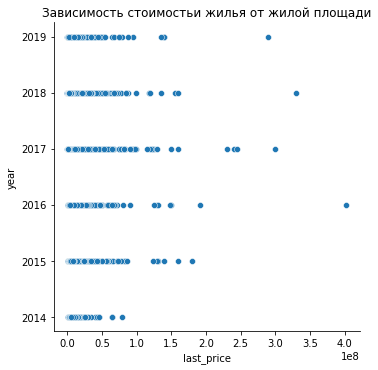

,year,last_price
0,2014,7700000.0
1,2015,5300500.0
2,2016,4540000.0
3,2017,4500000.0
4,2018,4550000.0
5,2019,5050000.0


In [96]:
sns.relplot(x='last_price', y='year',data=df)
plt.title('Зависимость стоимостьи жилья от жилой площади', fontsize= 12)
plt.show()
df.pivot_table(index='year',values='last_price',  aggfunc='median').reset_index().round(2)


С 2014 года цена на квартиры стремительно падала вплодь до 2019 года. 

С 2019 года показатели начали впервые достигать показателей 2015 гоад

## Зависимость стоимостьи жилья от от кол-ва комнат

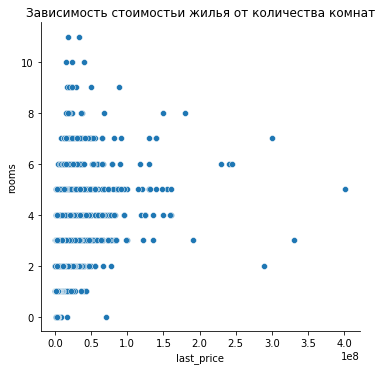

,year,last_price
0,2014,7700000.0
1,2015,5300500.0
2,2016,4540000.0
3,2017,4500000.0
4,2018,4550000.0
5,2019,5050000.0


In [97]:
sns.relplot(x='last_price', y='rooms',data=df)
plt.title('Зависимость стоимостьи жилья от количества комнат', fontsize= 12)
plt.show()
df.pivot_table(index='year',values='last_price',  aggfunc='median').reset_index().round(2)


Зависимость от кол-ва комнат хоть и слабая, но все же прослеживается

## Зависимость стоимости жилья от этажа квартиры

In [98]:
df.pivot_table(index='floor_type',values='last_price',  aggfunc='median').reset_index()

,floor_type,last_price
0,другой,4850000.0
1,первый,3900000.0
2,последний,4300000.0


По данной сводной таблице видно, что стоимость квартиры на последнес и первом этажах ниже чем на остальных

**Вывод**


На основании анализа выше, можно представить портреты коммерчески успешных объявлений и не очень.

**Коммерчески успешное объявление:**

Двухкомнатная квартира выложенная в марте 2019 года, обладает общей площадью от 50 квадратных метров, жилой площадью не менее 40 и площадью кухни не менее 10 квадратов, расположенная на средних этажах.

**Не очень коммерчески успешное объявление:**

Четырехкомнатная квартира выложенная в июне 2017 года, обладает общей площадью от 150 квадратных метров, жилой площадью не менее 100 и площадью кухни не менее 30 квадратов, расположенная на первом этаже.


## Считаем среднюю цену одного квадратного метра в зависимости от населенного пункта

In [99]:
df['locality_name'].value_counts()
#Посмотрим распределение населенных пунктов

Санкт-Петербург    15631
Мурино               585
Кудрово              470
Шушары               439
Всеволожск           398
                   ...  
Вахнова Кара           1
Левашово               1
Шугозеро               1
Хапо-Ое                1
Тёсово-4               1
Name: locality_name, Length: 308, dtype: int64

In [100]:
top_10_city = (df.pivot_table(index='locality_name', aggfunc={'last_price':'count', 'price_sq_meter':'mean'}).sort_values(by='last_price', ascending=False))
top_10_city.head(10).round(2)
#сделаем сводную таблицу для вывода средней цены за квадратный метр

,last_price,price_sq_meter
locality_name,,
Санкт-Петербург,15631,114691.27
Мурино,585,86015.03
Кудрово,470,95260.85
Шушары,439,78551.34
Всеволожск,398,68654.47
Пушкин,369,103125.82
Колпино,338,75424.58
Парголово,327,90175.91
Гатчина,307,68746.15


Санкт-Петербург, ожидаемо, оказался самым дорогим городом(111.5 тыс.)


Самыми недорогими оказались Гатчина(69 тыс.) и Выборг(59 тыс.)

## Считаем цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

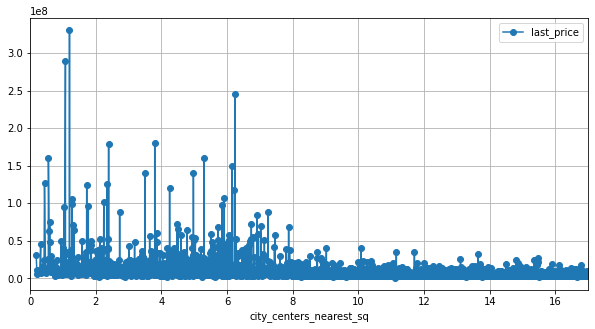

In [101]:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_sq', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,17), figsize=(10, 5))
)
plt.show()


Общая тенденция - чем дальше от центра - тем дешевле. Однако, есть резкий спад цены на 3-4 километрах от центра. 

Предпалогаю, что это может быть связано c тем, что конкретный участок центра менее всего приспособлен к современной жизни :

* Неблагоприятными условиями жилья. В центральных районах Петербурга очень много бывших коммуналок, не всегда хорошо адаптированных под современного жителя. Например, плохой ремонт. При этом цена, остается рыночной, т.к., территориально это все еще центр города.


* Проблемы с парковкой. В центре Петербурга крайне сложно оставить автомобиль на длительное время. Особенно, если бесплатно.


* Коммунальные услуги. Коммуналка в центре города всегда дороже, чем в отдаленных районах

Ближайший пример такого района Петербурга - улица Марата.

Все эти факторы могут сказываться на итоговой цене квартиры.

### Общий вывод

Мы изучили и проанализировали датасет с объявлениями по продаже картир в Петербурге за 2014-2019 годы

**Что мы можем утверждать на основе данного анализа:**

* Ценовой диапазон начинается, приблизительно, от 1 миллиона рублей и может заканчиваться на нескольких сотнях миллионов.



* Класс квартир присутствует как средний, так и элитный(на это указывают цена, кол-во комнат, общая и жилая площади и прочие параметры)



* Квадратный метр в Петербурге дороже чем в отдаленных районах или области


* Критерии, которые влияют на стоимость следующие:

  1)общая площадь;

  2)соотношение площади кухни и жилой площади к общей;

  3)количество комнат;

  4)высота потолка;

  5)этаж;

  6)наличие парка или водоема в радиусе 3-х км.


* В центре города цена на жилье оценивается практически одинаково высоко, но есть определенные участки города, где цена может быть ниже, чтобы привлечь покупателя


* В Петербурге разнообразные планировки квартир. От однокомнатных, до десятикомнатных



* Рынок недвижимости довольно сезонный. В марте 2019 и в июле того же года цены на одну и ту же квартиру могут быть координально разные.



* В среднем, квартиры, опубликованные в будни, имеют большую цену, чем те, что размещены в выходные. 



* Певрый и последний этажи предпочтительны покупателям меньше всего
